In [2]:
from square_lattice import SquareLattice
from cplex_solver import CPLEXSolver as solver
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from dwave_solver import DwaveSolver as DS
TOKEN='DEV-f64597231d0487e07b32d33cc7aa2a291e725be4'
dsolver = DS(token=TOKEN)

In [55]:
l3_3 = SquareLattice(7)
parameter = np.arange(0, 1.5, 0.05)

In [56]:
energy = np.zeros(len(parameter))
polarization = np.zeros(len(parameter))
for n in tqdm(range(len(parameter))):
    solution, energy[n] = solver().sample(qubo=l3_3.create_full_hamiltonian(parameter[n], 0), log_output=False)
    energy[n] += l3_3.extra_energy
    polarization[n] = sum(solution)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 12.11it/s]


In [57]:
true_energy = energy / 49
true_polarization = np.abs((49 - 2 * polarization) / 49)

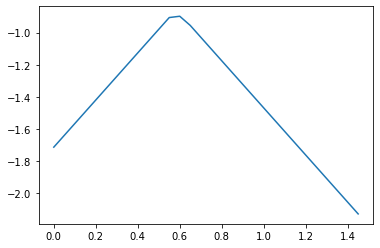

In [58]:
plt.plot(parameter, true_energy)

In [62]:
denergy = np.zeros((len(parameter), 25))
dpolarization = np.zeros((len(parameter), 25))
for n in tqdm(range(len(parameter))):
    for s in range(25):
        dsolution, denergy[n, s] = dsolver.sample(l3_3.create_full_hamiltonian(parameter[n], 0))
        denergy[n, s] += l3_3.extra_energy
        dpolarization[n, s] = sum(dsolution)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [16:54<00:00, 33.82s/it]


In [63]:
true_denergy = denergy / 49
true_dpolarization = np.abs((49 - 2 * dpolarization) / 49)

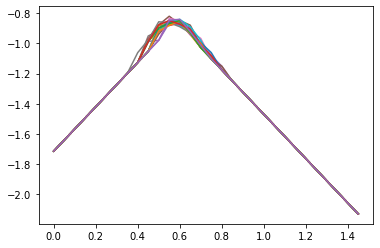

In [64]:
plt.plot(parameter, true_denergy)

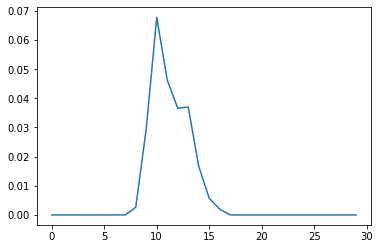

In [65]:
plt.plot(true_denergy.mean(axis=1) - true_energy)

In [66]:
np.std(true_denergy, ddof=1, axis=1) / np.sqrt(25)

array([0.00000000e+00, 0.00000000e+00, 4.53246652e-17, 4.53246652e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.61224490e-03, 7.52995775e-03, 6.42344035e-03, 2.85198757e-03,
       2.62919670e-03, 3.26386022e-03, 3.06276605e-03, 2.21062270e-03,
       1.35618349e-03, 1.81298661e-17, 1.81298661e-17, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.53246652e-17, 4.53246652e-17,
       0.00000000e+00, 4.53246652e-17, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.62597321e-17])

In [71]:
denergy1 = np.zeros((len(parameter), 25))
dpolarization1 = np.zeros((len(parameter), 25))
for n in tqdm(range(len(parameter))):
    for s in range(25):
        dsolution1, denergy1[n, s] = dsolver.sample(l3_3.create_full_hamiltonian(parameter[n], 0))
        denergy1[n, s] += l3_3.extra_energy
        dpolarization1[n, s] = sum(dsolution)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [18:38<00:00, 37.28s/it]


In [72]:
true_denergy1 = denergy1 / 49
true_dpolarization1 = np.abs((49 - 2 * dpolarization1) / 49)

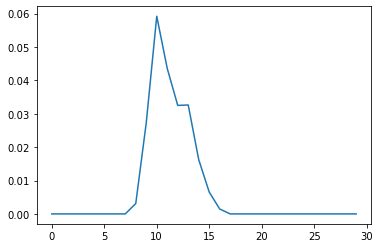

In [73]:
final_denergy = np.hstack((true_denergy, true_denergy1))
plt.plot(final_denergy.mean(axis=1) - true_energy)

In [74]:
np.std(final_denergy, ddof=1, axis=1) / np.sqrt(50)

array([3.17206578e-17, 0.00000000e+00, 0.00000000e+00, 3.17206578e-17,
       0.00000000e+00, 3.17206578e-17, 0.00000000e+00, 3.17206578e-17,
       2.19898527e-03, 5.04592547e-03, 4.05027522e-03, 1.90342171e-03,
       1.72168728e-03, 2.35808699e-03, 2.02824952e-03, 1.47971750e-03,
       8.30857755e-04, 1.48783073e-17, 1.26882631e-17, 0.00000000e+00,
       6.34413157e-17, 0.00000000e+00, 3.14018492e-17, 3.26584161e-17,
       6.34413157e-18, 3.17206578e-17, 0.00000000e+00, 3.17206578e-17,
       0.00000000e+00, 6.34413157e-17])

In [75]:
final_denergy.mean(axis=1)

array([-1.71428571, -1.64081633, -1.56734694, -1.49387755, -1.42040816,
       -1.34693878, -1.27346939, -1.2       , -1.12342857, -1.02579592,
       -0.92040816, -0.86257143, -0.86546939, -0.9224898 , -1.01232653,
       -1.0955102 , -1.17404082, -1.24897959, -1.32244898, -1.39591837,
       -1.46938776, -1.54285714, -1.61632653, -1.68979592, -1.76326531,
       -1.83673469, -1.91020408, -1.98367347, -2.05714286, -2.13061224])

In [77]:
true_denergy1.mean(axis=1) - final_denergy.mean(axis=1)

array([-2.22044605e-16,  0.00000000e+00, -2.22044605e-16, -4.44089210e-16,
        0.00000000e+00,  2.22044605e-16,  0.00000000e+00,  2.22044605e-16,
        4.89795918e-04, -2.28571429e-03, -8.57142857e-03, -2.65306122e-03,
       -4.08163265e-03, -4.36734694e-03, -4.08163265e-04,  8.16326531e-04,
       -4.89795918e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.44089210e-16,  0.00000000e+00, -4.44089210e-16,  4.44089210e-16,
        2.22044605e-16, -4.44089210e-16,  0.00000000e+00, -2.22044605e-16,
        0.00000000e+00, -4.44089210e-16])

In [80]:
for i in (final_denergy.mean(axis=1) - true_energy):
    print(i)

2.220446049250313e-16
0.0
1.6209256159527285e-14
2.220446049250313e-16
0.0
-2.220446049250313e-16
1.1102230246251565e-14
1.2212453270876722e-14
0.003102040816326479
0.027265306122449262
0.0591836734693878
0.04355102040817371
0.032489795918367315
0.03261224489795933
0.016244897959183824
0.006530612244897593
0.0014693877551024137
0.0
0.0
0.0
-4.440892098500626e-16
2.220446049250313e-16
0.0
-4.440892098500626e-16
6.661338147750939e-16
2.220446049250313e-16
0.0
2.220446049250313e-16
0.0
4.440892098500626e-16


In [81]:
std = np.std(final_denergy, ddof=1, axis=1) / np.sqrt(50)
for i in std:
    print(i)

3.172065784643304e-17
0.0
0.0
3.172065784643304e-17
0.0
3.172065784643304e-17
0.0
3.172065784643304e-17
0.0021989852690849176
0.005045925473834897
0.004050275215583034
0.0019034217137212023
0.0017216872801362594
0.0023580869896008584
0.002028249521721627
0.0014797174974285033
0.000830857755361256
1.4878307347487627e-17
1.2688263138573216e-17
0.0
6.344131569286608e-17
0.0
3.14018491736755e-17
3.2658416101567185e-17
6.344131569286608e-18
3.172065784643304e-17
0.0
3.172065784643304e-17
0.0
6.344131569286608e-17
